<h1>Instrucciones del proyecto</h1>
<h2>Descarga y prepara los datos.  Explica el procedimiento.</h2>



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import seaborn as sns
import numpy as np

<B><FONT color=blue> SE IMPORTAN LOS DATOS PARA SU ANALISIS </FONT></B>

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


<B><FONT color=blue> HAY DATOS AUSENTES EN LA COLUMNA LLAMADA TENURE </FONT></B>

In [4]:
data[data['Tenure'].isna()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [5]:
data=data.fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
data[data['Tenure']==0]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
29,30,15656300,Lucciano,411,France,Male,29,0.0,59697.17,2,1,1,53483.21,0
30,31,15589475,Azikiwe,591,Spain,Female,39,0.0,0.00,3,1,0,140469.38,1
35,36,15794171,Lombardo,475,France,Female,45,0.0,134264.04,1,1,0,27822.99,1
48,49,15766205,Yin,550,Germany,Male,38,0.0,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,0.0,146050.97,2,0,0,86424.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,0.0,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,0.0,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,0.0,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,0.0,123841.49,2,1,0,96833.00,0


<B><FONT color=blue> SE RELLENAN LOS DATOS DE TENURE CON 0.0 YA QUE NO AFECTA EL PROCESAMIENTO POSTERIOR </FONT></B>

In [7]:
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3180,3181,15750447,Ozoemena,678,France,Female,60,10.0,117738.81,1,1,0,147489.76,1
839,840,15727915,Artemiev,507,France,Male,36,4.0,83543.37,1,0,0,140134.43,0
9201,9202,15788183,Longo,458,Germany,Female,43,1.0,106870.12,2,1,0,100564.37,0
1241,1242,15760774,Hargraves,519,France,Female,21,1.0,146329.57,2,1,1,194867.27,0
2733,2734,15641480,Sinnett,571,France,Male,32,5.0,131354.25,1,1,0,125256.53,0


<B><FONT color=blue> SE ANALIZAN LOS DATOS DE LAS COLUMNAS </FONT></B>

In [8]:
data_1=data.drop(columns=['RowNumber','Surname','Geography'])
data_1

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,Female,42,2.0,0.00,1,1,1,101348.88,1
1,15647311,608,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,15619304,502,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,15701354,699,Female,39,1.0,0.00,2,0,0,93826.63,0
4,15737888,850,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,15569892,516,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,15584532,709,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,15682355,772,Male,42,3.0,75075.31,2,1,0,92888.52,1


<B><FONT color=blue> SE DECIDE REMOVER LAS COLUMNAS : ROWNUMBER, SURNAME, GEOGRAPHY YA QUE NO APORTAN MUCHA INFORMACION PARA LA PREDICCIÓN  </FONT></B>

In [9]:
data_ohe=pd.get_dummies(data_1, drop_first=True)

<B><FONT color=blue> YA QUE SE HA REMOVIDO SE DECIDE EMPLEAR EL ONE HOT ENCODING PARA PODER MANIPULAR LOS DATOS  </FONT></B>

In [10]:
data_ohe

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male
0,15634602,619,42,2.0,0.00,1,1,1,101348.88,1,0
1,15647311,608,41,1.0,83807.86,1,0,1,112542.58,0,0
2,15619304,502,42,8.0,159660.80,3,1,0,113931.57,1,0
3,15701354,699,39,1.0,0.00,2,0,0,93826.63,0,0
4,15737888,850,43,2.0,125510.82,1,1,1,79084.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5.0,0.00,2,1,0,96270.64,0,1
9996,15569892,516,35,10.0,57369.61,1,1,1,101699.77,0,1
9997,15584532,709,36,7.0,0.00,1,0,1,42085.58,1,0
9998,15682355,772,42,3.0,75075.31,2,1,0,92888.52,1,1


In [11]:
target_ohe = data_ohe['Exited']
features_ohe = data_ohe.drop('Exited', axis=1)

In [12]:
features_ohe

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male
0,15634602,619,42,2.0,0.00,1,1,1,101348.88,0
1,15647311,608,41,1.0,83807.86,1,0,1,112542.58,0
2,15619304,502,42,8.0,159660.80,3,1,0,113931.57,0
3,15701354,699,39,1.0,0.00,2,0,0,93826.63,0
4,15737888,850,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5.0,0.00,2,1,0,96270.64,1
9996,15569892,516,35,10.0,57369.61,1,1,1,101699.77,1
9997,15584532,709,36,7.0,0.00,1,0,1,42085.58,0
9998,15682355,772,42,3.0,75075.31,2,1,0,92888.52,1


In [13]:
target_ohe

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

<B><FONT color=blue> SE SEGMENTAN LOS DATOS DE DATA_OHE EN TARGET_OHE  Y FEATURES_OHE </FONT></B>

<h2>Examina el equilibrio de clases. Entrena el modelo sin tener en cuenta el desequilibrio. Describe brevemente tus hallazgos.</h2>

In [14]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features_ohe, target_ohe, test_size=0.25, random_state=12345)
features_train_2,features_test, target_train_2, target_test = train_test_split(
    features_ohe, target_ohe, test_size=0.25, random_state=12345)

<b><FONT color=blue>SEPARAR DATOS POR CLASE</B>

In [15]:
data_ohe['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<b><FONT color=blue>SOBREMUESTREO</B>


In [16]:
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

In [17]:
features_upsampled = pd.concat([features_zeros] + [features_ones] * 3)
target_upsampled = pd.concat([target_zeros] + [target_ones] * 3)

In [18]:
target_upsampled.shape

(10504,)

In [19]:
 features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

In [20]:
print(features_upsampled)
print(target_upsampled)


      CustomerId  CreditScore  Age  Tenure    Balance  NumOfProducts  \
4990    15802857          659   33     8.0  115409.60              1   
3660    15736431          494   27     2.0       0.00              2   
8127    15623063          651   35     8.0  110067.71              1   
9998    15682355          772   42     3.0   75075.31              2   
2320    15775888          593   38     5.0   85626.60              1   
...          ...          ...  ...     ...        ...            ...   
8646    15792726          470   25     8.0  127974.06              2   
3159    15680587          834   23     4.0  131254.81              1   
3169    15688172          677   40     5.0       0.00              2   
2897    15664150          528   29     0.0  170214.23              2   
8513    15740602          674   27     4.0  111568.01              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Gender_Male  
4990          0               1          1539.21            0  
3660   

In [21]:
model_up= LogisticRegression(random_state=12345, solver='liblinear')
model_up.fit(features_upsampled,target_upsampled)
predicted_valid_up=model_up.predict(features_valid)


Matriz de confusion upsampled:
 [[1614  351]
 [ 436   99]]
Recall score upsampled:  0.18504672897196262
Precision score upsampled:  0.22
F1 score upsampled:  0.20101522842639594


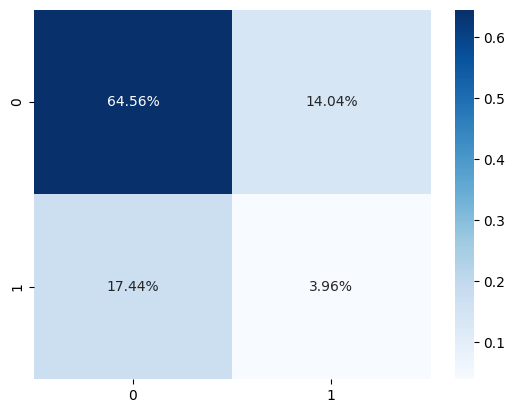

In [22]:
cnf_matrix_up=confusion_matrix(target_valid,predicted_valid_up)
print("Matriz de confusion upsampled:\n",confusion_matrix(target_valid,predicted_valid_up))
sns.heatmap(cnf_matrix_up/np.sum(cnf_matrix_up), annot=True, 
            fmt='.2%', cmap='Blues')
print("Recall score upsampled: ",recall_score(target_valid,predicted_valid_up))
print("Precision score upsampled: ",precision_score(target_valid,predicted_valid_up))
print("F1 score upsampled: ",f1_score(target_valid,predicted_valid_up))

In [23]:
probabilities_valid_up_s = model_up.predict_proba(features_valid)
probabilities_one_valid_up = probabilities_valid_up_s[:, 1]
auc_roc_up=roc_auc_score(target_valid, probabilities_one_valid_up)
print(auc_roc_up)

0.5596014363510975


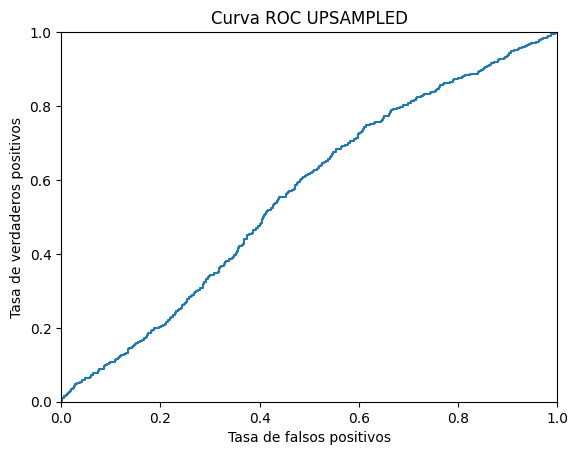

In [24]:
fup, tup, thresholds_up = roc_curve(target_valid,probabilities_one_valid_up)

plt.figure()
plt.plot(fup, tup)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')

plt.title('Curva ROC UPSAMPLED')
plt.show()

<b><FONT COLOR=BLUE> SE PUEDE OBSERVAR QUE EN CASO DE SOBRESAMPLEO DE LOS DATOS LOS VERDADEROS NEGATIVOS TIENEN UN PORCENTAJE SIGNIFICATIVO A COMPARACION DE LOS VERDADEROS POSITIVOS, POR OTRA PARTE EN LA MEDIDA F1 APENAS ALCANZA UN 0.20. </B></FONT>

<b>DOWNSAMPLE</B>


In [25]:
features_downsampled = pd.concat([features_zeros.sample(frac=0.3,random_state=12345)] + [features_ones])
target_downsampled = pd.concat([target_zeros.sample(frac=0.3,random_state=12345)] + [target_ones])

In [26]:
 features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

In [27]:
print(features_downsampled)
print(target_downsampled)

      CustomerId  CreditScore  Age  Tenure    Balance  NumOfProducts  \
6953    15579109          574   35     0.0  163856.76              1   
3340    15809263          729   29     0.0  109676.52              1   
9753    15705174          656   68     7.0  153545.11              1   
420     15810418          756   60     3.0  115924.89              1   
5853    15765300          596   40     5.0   62389.03              3   
...          ...          ...  ...     ...        ...            ...   
9104    15683339          656   34     6.0   59877.33              1   
3121    15593715          634   27     3.0  107027.52              1   
765     15812351          710   27     0.0  135277.96              1   
9690    15791674          846   34    10.0  142388.61              2   
8500    15584785          660   37     2.0   97324.91              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Gender_Male  
6953          1               1         15118.20            1  
3340   

In [28]:
model_dw= LogisticRegression(random_state=12345, solver='liblinear')
model_dw.fit(features_downsampled,target_downsampled)
predicted_valid_dw=model_dw.predict(features_valid)

Matriz de confusion upsampled:
 [[1435  530]
 [ 379  156]]
Recall score downsampled:  0.29158878504672897
Precision score downsampled:  0.22740524781341107
F1 score downsampled:  0.25552825552825553


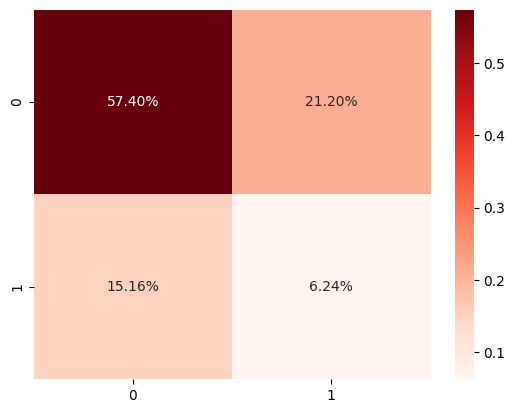

In [29]:
cnf_matrix_dw=confusion_matrix(target_valid,predicted_valid_dw)
print("Matriz de confusion upsampled:\n",confusion_matrix(target_valid,predicted_valid_dw))
sns.heatmap(cnf_matrix_dw/np.sum(cnf_matrix_dw), annot=True,fmt='.2%', cmap='Reds')
print("Recall score downsampled: ",recall_score(target_valid,predicted_valid_dw))
print("Precision score downsampled: ",precision_score(target_valid,predicted_valid_dw))
print("F1 score downsampled: ",f1_score(target_valid,predicted_valid_dw))

In [30]:
probabilities_valid_dw_s = model_dw.predict_proba(features_valid)
probabilities_one_valid_dw = probabilities_valid_dw_s[:, 1]
auc_roc_dw=roc_auc_score(target_valid, probabilities_one_valid_dw)
print("AUC_ROC DOWNSAMPLED:",auc_roc_dw)

AUC_ROC DOWNSAMPLED: 0.5619176713990155


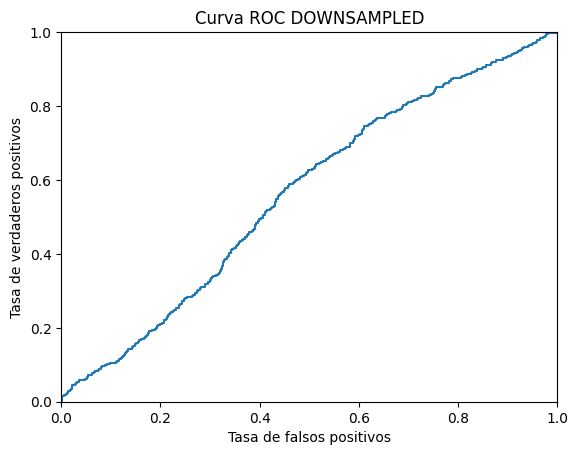

In [31]:
fdw, tdw, thresholds_dw = roc_curve(target_valid,probabilities_one_valid_dw)

plt.figure()
plt.plot(fdw, tdw)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC DOWNSAMPLED')
plt.show()

<b><FONT COLOR=BLUE> EN EL CASO DEL SUBMUESTREO A COMPARACION DEL SOBREMUESTREO BAJAN LOS VERDADEROS NEGATIVOS ASI Y SUBE EL PORCENTAJE DE VERDADEROS POSITIVOS ,  POR OTRA PARTE LA MEDIDA DE F1 SUBIO A  0.25.

<B>SIN BALANCE DE DATOS</B>

In [32]:
model_lr_des= LogisticRegression(random_state=12345, solver='liblinear')
model_lr_des.fit(features_train,target_train)
predicted_valid=model_lr_des.predict(features_valid)

In [33]:
probabilities_valid_lr = model_lr_des.predict_proba(features_valid)
probabilities_one_valid_lr = probabilities_valid_lr[:, 1]
auc_roc_lr=roc_auc_score(target_valid, probabilities_one_valid_lr)
print(auc_roc_lr)

0.5602159282775677


[[1965    0]
 [ 535    0]]


<AxesSubplot:>

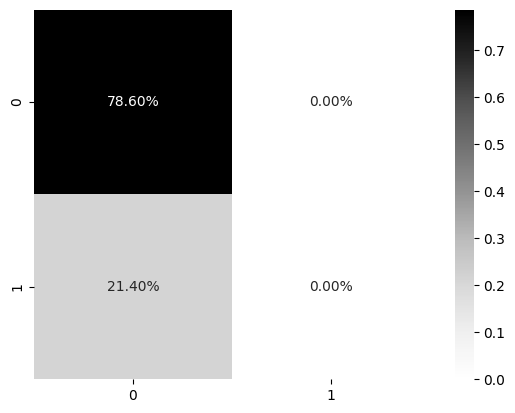

In [34]:
cnf_matrix=confusion_matrix(target_valid,predicted_valid)
print(cnf_matrix)
sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True,fmt='.2%', cmap='Greys')

In [35]:
print(recall_score(target_valid,predicted_valid))

0.0


In [36]:
print(precision_score(target_valid,predicted_valid))

0.0


/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
print(f1_score(target_valid,predicted_valid))

0.0


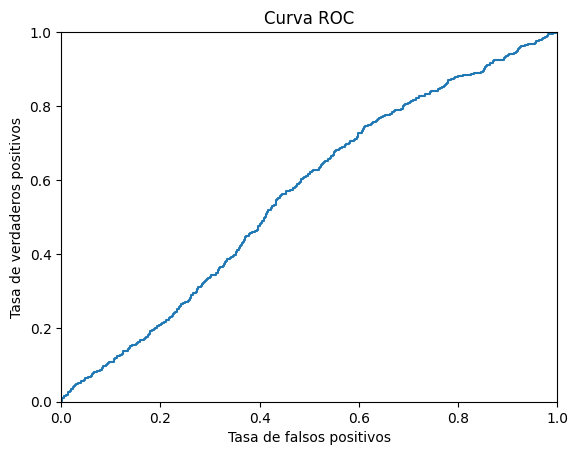

In [38]:
fpr, tpr, thresholds = roc_curve(target_valid,probabilities_one_valid_lr)

plt.figure()
plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
# < utiliza las funciones plt.xlabel() y plt.ylabel() para
#   nombrar los ejes "Tasa de falsos positivos" y "Tasa de verdaderos positivos">
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
# < agrega el encabezado "Curva ROC" con la función plt.title() >
plt.title('Curva ROC')
plt.show()


<B><FONT color=blue> En el modelo de regresion logistica y segun a la matriz de confusion hay muchos verdaderos negativos, así como falso negativos , recall, y precision nos da el valor de 0.0, así que el modelo en desequilibrio no hace las predicciones.  </FONT></B>

<B>Crea un modelo con el máximo valor F1 posible. Para aprobar la revisión, necesitas un valor F1 de al menos 0.59. Verifica F1 para el conjunto de prueba. 

Además, debes medir la métrica AUC-ROC y compararla con el valor F1.</B>

<h2>Mejora la calidad del modelo. <h3>Asegúrate de utilizar al menos dos enfoques para corregir el desequilibrio de clases.</h3><h3> Utiliza conjuntos de entrenamiento y validación para encontrar el mejor modelo y el mejor conjunto de parámetros.</h3> <h3>Entrena diferentes modelos en los conjuntos de entrenamiento y validación.</h3> Encuentra el mejor. Describe brevemente tus hallazgos.</h2>

In [39]:
best=0
for num in range(1,10):
    for cl in range(1,30):    
        model = LogisticRegression(random_state=12345,class_weight={0: num, 1: num+ (cl/10) }, solver='liblinear')
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        #print('F1:', f1_score(target_valid, predicted_valid))
        f1=f1_score(target_valid, predicted_valid)
        if  f1 > best :
            best = f1
            print(f"el mejor valor de class_weight es : 0: {num},y en 1: {num +(cl/10)}, con f1: {f1}")
        
      

el mejor valor de class_weight es : 0: 1,y en 1: 1.8, con f1: 0.0037313432835820895
el mejor valor de class_weight es : 0: 1,y en 1: 2.0, con f1: 0.007434944237918216
el mejor valor de class_weight es : 0: 1,y en 1: 2.1, con f1: 0.014814814814814815
el mejor valor de class_weight es : 0: 1,y en 1: 2.2, con f1: 0.01824817518248175
el mejor valor de class_weight es : 0: 1,y en 1: 2.3, con f1: 0.03191489361702128
el mejor valor de class_weight es : 0: 1,y en 1: 2.4, con f1: 0.04819277108433736
el mejor valor de class_weight es : 0: 1,y en 1: 2.5, con f1: 0.07236842105263158
el mejor valor de class_weight es : 0: 1,y en 1: 2.6, con f1: 0.09567901234567901
el mejor valor de class_weight es : 0: 1,y en 1: 2.7, con f1: 0.11516853932584271
el mejor valor de class_weight es : 0: 1,y en 1: 2.8, con f1: 0.141206675224647
el mejor valor de class_weight es : 0: 1,y en 1: 2.9, con f1: 0.17162471395881004
el mejor valor de class_weight es : 0: 1,y en 1: 3.0, con f1: 0.20101522842639594
el mejor valor

<B><FONT color=blue> SE HACE UN CICLO PARA ENCONTRAR EL MEJOR VALOR F1 PARA CLASS_WEIGHT el cual es 0.49 con 0 :1 y 1: 3.9, AUN ASÍ ES INSUFICIENTE </FONT></B>

In [40]:
model = LogisticRegression(random_state=12345,class_weight='balanced', solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.4888888888888889



<B><FONT color=blue> En ESTE MODELO DE REGRESION LOGISTICA SE BALANCEAN LAS CLASES, PERO AUN NO NOS DA EL VALOR MINIMO F1, ASI QUE NO ES FUNCIONAL ESTE MODELO  </FONT></B>

In [41]:


for depth in range(1,200):
    model= DecisionTreeClassifier(random_state=12345,max_depth=depth,class_weight='balanced')
    model.fit(features_train,target_train)
    predictions_valid = model.predict(features_valid)
    f1=f1_score(target_valid, predictions_valid)
    if f1  >= 0.56 :
        print(f"el mejor valor depth es : {depth}, con : f1:{f1}")

el mejor valor depth es : 5, con : f1:0.5974025974025974
el mejor valor depth es : 6, con : f1:0.5893792071802543
el mejor valor depth es : 7, con : f1:0.5823389021479713


In [42]:


for depth in range(1,200):
    model= DecisionTreeClassifier(random_state=12345,max_depth=depth,class_weight={0: 1, 1: 3.9} )
    model.fit(features_train,target_train)
    predictions_valid = model.predict(features_valid)
    f1=f1_score(target_valid, predictions_valid)
    if f1  >= 0.56 :
        print(f"el mejor valor depth es : {depth}, con : f1:{f1}")

el mejor valor depth es : 5, con : f1:0.5967479674796748
el mejor valor depth es : 6, con : f1:0.5902621722846443
el mejor valor depth es : 7, con : f1:0.5834658187599364



<B><FONT color=blue> EN ESTE MODELO DE ARBOL DE CLASIFICACION DE IGUAL MANERA SE CAMBIA EL PESO DE LAS CLASES A BALANCEADO OBTENIENDO EL MEJOR VALOR EN 0.5967, EN UNA PROFUNDIDAD MAXIMA DE 5 , SIN EMBARGO , AUN NOS QUEDA OTRO METODO POR PROBAR, EL CUAL HYA OPCION DE  MEJORAR</FONT></B>

In [43]:
best_score = 0
for m in range(1,12):
    for n in range(1,200):
        model = RandomForestClassifier(random_state=12345,n_estimators=n,max_depth=m,class_weight='balanced')
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        f1_arbol=f1_score(target_valid, predicted_valid)
        
        precision_arbol=precision_score(target_valid,predicted_valid)
        #print(f"est: {n} , depth:{m}")
        if f1_arbol > best_score :
            best_score = f1_arbol
            print(f"PRECISION n: {n}, depth: {m} y precision_score: {precision_arbol}")
            print(f"F1_ARBOL  n: {n}, depth: {m}, y f1 : {f1_arbol}")


PRECISION n: 1, depth: 1 y precision_score: 0.2611408199643494
F1_ARBOL  n: 1, depth: 1, y f1 : 0.35365117682558844
PRECISION n: 2, depth: 1 y precision_score: 0.27734711455641686
F1_ARBOL  n: 2, depth: 1, y f1 : 0.37971698113207547
PRECISION n: 3, depth: 1 y precision_score: 0.4514501891551072
F1_ARBOL  n: 3, depth: 1, y f1 : 0.5391566265060241
PRECISION n: 12, depth: 1 y precision_score: 0.4707482993197279
F1_ARBOL  n: 12, depth: 1, y f1 : 0.5448818897637796
PRECISION n: 49, depth: 1 y precision_score: 0.44510035419126326
F1_ARBOL  n: 49, depth: 1, y f1 : 0.5455861070911723
PRECISION n: 115, depth: 1 y precision_score: 0.4412442396313364
F1_ARBOL  n: 115, depth: 1, y f1 : 0.5459729151817534
PRECISION n: 21, depth: 2 y precision_score: 0.44885679903730447
F1_ARBOL  n: 21, depth: 2, y f1 : 0.5461200585651538
PRECISION n: 26, depth: 2 y precision_score: 0.4542124542124542
F1_ARBOL  n: 26, depth: 2, y f1 : 0.5494830132939438
PRECISION n: 29, depth: 2 y precision_score: 0.4730769230769230


<B><FONT color=blue>SE HACE LA PRUEBA PARA ITERACIONES DE VALORES EN LOS HIPERPARAMETROS N_ESTIMATORS Y MAX_DEPTH, ASI MISMO SE HACE CON EL MODELO BALANCEADO, QUEDANDO EL MEJOR RESULTADO F1 EN 0.6241, CON N_ESTIMATORS=41 Y PROFUNDIDAD MAXIMA DE 9.    </FONT></B>

<b>DOWNSAMPLED</B>

In [44]:
best_score = 0
for m in range(1,25):
    for n in range(1,150):
        model = RandomForestClassifier(random_state=12345,n_estimators=n,max_depth=m,class_weight='balanced')
        model.fit(features_downsampled, target_downsampled)
        predicted_valid = model.predict(features_valid)
        f1_arbol=f1_score(target_valid, predicted_valid)
        
        precision_arbol=precision_score(target_valid,predicted_valid)
        #print(f"est: {n} , depth:{m}")
        if f1_arbol > best_score :
            best_score = f1_arbol
            print(f"PRECISION n: {n}, depth: {m} y precision_score: {precision_arbol}")
            print(f"F1_ARBOL  n: {n}, depth: {m}, y f1 : {f1_arbol}")

PRECISION n: 1, depth: 1 y precision_score: 0.2611408199643494
F1_ARBOL  n: 1, depth: 1, y f1 : 0.35365117682558844
PRECISION n: 2, depth: 1 y precision_score: 0.27734711455641686
F1_ARBOL  n: 2, depth: 1, y f1 : 0.37971698113207547
PRECISION n: 3, depth: 1 y precision_score: 0.3797235023041475
F1_ARBOL  n: 3, depth: 1, y f1 : 0.508641975308642
PRECISION n: 7, depth: 1 y precision_score: 0.3956692913385827
F1_ARBOL  n: 7, depth: 1, y f1 : 0.5183752417794971
PRECISION n: 8, depth: 1 y precision_score: 0.39548577036310106
F1_ARBOL  n: 8, depth: 1, y f1 : 0.5186615186615187
PRECISION n: 9, depth: 1 y precision_score: 0.4001996007984032
F1_ARBOL  n: 9, depth: 1, y f1 : 0.5217957059206246
PRECISION n: 42, depth: 1 y precision_score: 0.4037328094302554
F1_ARBOL  n: 42, depth: 1, y f1 : 0.5292981326464906
PRECISION n: 61, depth: 1 y precision_score: 0.4082246740220662
F1_ARBOL  n: 61, depth: 1, y f1 : 0.5313315926892951
PRECISION n: 62, depth: 1 y precision_score: 0.4102822580645161
F1_ARBOL 


<B><FONT color=blue> EN DOWNSAMPLE SE LLEGA A LA METRICA F1 A 0.60 Y EN PRECISION 0.50 LO CUAL ES BAJO PERO APENAS ARRIBA DEL MARGEN DE TOLERANCIA CON NUMERO DE ESTIMADORES : 83 Y PROFUNDIDAD DE 8 .  </FONT></B>

<B>UPSAMPLED</b>

In [46]:
best_score_up = 0
for m in range(1,20):
    for n in range(150,250):
        model = RandomForestClassifier(random_state=12345,n_estimators=n,max_depth=m,class_weight='balanced')
        model.fit(features_upsampled, target_upsampled)
        predicted_valid = model.predict(features_valid)
        f1_arbol_up=f1_score(target_valid, predicted_valid)
        
        precision_arbol_up=precision_score(target_valid,predicted_valid)
        #print(f"est: {n} , depth:{m}")
        if f1_arbol_up > best_score_up :
            best_score_up = f1_arbol_up
            print(f"PRECISION n: {n}, depth: {m} y precision_score: {precision_arbol_up}")
            print(f"F1_ARBOL  n: {n}, depth: {m}, y f1 : {f1_arbol_up}")

PRECISION n: 150, depth: 1 y precision_score: 0.4369266055045872
F1_ARBOL  n: 150, depth: 1, y f1 : 0.5415778251599147
PRECISION n: 170, depth: 1 y precision_score: 0.4379310344827586
F1_ARBOL  n: 170, depth: 1, y f1 : 0.5423487544483986
PRECISION n: 224, depth: 1 y precision_score: 0.4372146118721461
F1_ARBOL  n: 224, depth: 1, y f1 : 0.5428773919206237
PRECISION n: 150, depth: 2 y precision_score: 0.44954128440366975
F1_ARBOL  n: 150, depth: 2, y f1 : 0.5572139303482587
PRECISION n: 156, depth: 2 y precision_score: 0.4504608294930876
F1_ARBOL  n: 156, depth: 2, y f1 : 0.5573770491803279
PRECISION n: 157, depth: 2 y precision_score: 0.45098039215686275
F1_ARBOL  n: 157, depth: 2, y f1 : 0.557774607703281
PRECISION n: 158, depth: 2 y precision_score: 0.454123112659698
F1_ARBOL  n: 158, depth: 2, y f1 : 0.5601719197707736
PRECISION n: 159, depth: 2 y precision_score: 0.4557109557109557
F1_ARBOL  n: 159, depth: 2, y f1 : 0.5613783201722901
PRECISION n: 160, depth: 2 y precision_score: 0.

 
<B><FONT color=blue> EN EL CASO DE UPSAMPLING NOS DA UNAS METRICAS DE 0.618 TANTO EN F1 Y EN PRECISION 0.581, LO CUAL TAMBIEN ES BAJO , CON LOS HIPERPARAMETROS EN N_ESTIMATORS: 171 Y MAX_DEPTH EN 11 . </FONT></B>

<h2>Realiza la prueba final.</h2>

<B>PRUEBA CON UPSAMPLING  </B>

In [63]:
model_up_fin = RandomForestClassifier(random_state=12345,n_estimators=171,max_depth=11,class_weight='balanced')
model_up_fin=model_up_fin.fit(features_upsampled, target_upsampled)
predicted_valid_up_fin = model_up_fin.predict(features_valid)
f1_arbol_up_fin=f1_score(target_valid,predicted_valid_up_fin)
print(f1_score(target_valid,predicted_valid_up_fin))

0.618881118881119


In [64]:
probabilities_valid_forest_up_f = model_up_fin.predict_proba(features_valid)
probabilities_one_valid_forest_up_f = probabilities_valid_forest_up_f[:, 1]
auc_roc_up_f=roc_auc_score(target_valid, probabilities_one_valid_forest_up_f)
print(auc_roc_up_f)

0.8482965922332405


In [65]:
print(confusion_matrix(target_valid,predicted_valid_up_fin))
print(recall_score(target_valid,predicted_valid_up_fin))
print(precision_score(target_valid,predicted_valid_up_fin))

[[1710  255]
 [ 181  354]]
0.6616822429906543
0.5812807881773399


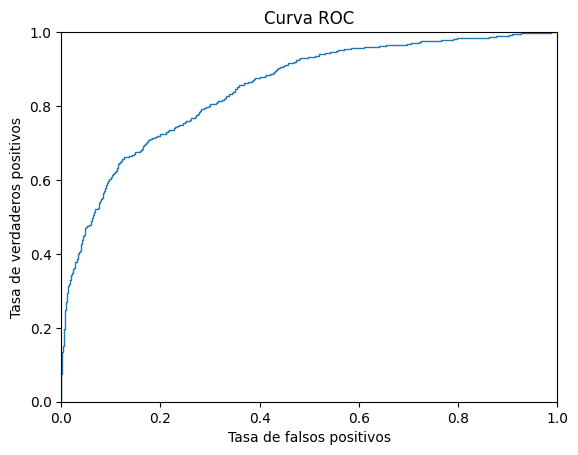

In [66]:
fup_f_forest, tup_f_forest, thresholds_forest_up_f = roc_curve(target_valid,probabilities_one_valid_forest_up_f)

plt.figure()
plt.plot(fup_f_forest, tup_f_forest,linewidth=1)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

downsampled

In [67]:
model_dw_fin = RandomForestClassifier(random_state=12345,n_estimators=83,max_depth=8,class_weight='balanced')
model_dw_fin=model_dw_fin.fit(features_downsampled, target_downsampled)
predicted_valid_dw_fin = model_dw_fin.predict(features_valid)
f1_arbol_dw_fin=f1_score(target_valid,predicted_valid_dw_fin)
print(f1_score(target_valid,predicted_valid_dw_fin))

0.6096096096096096


In [68]:
probabilities_valid_forest_dw_f = model_dw_fin.predict_proba(features_valid)
probabilities_one_valid_forest_dw_f = probabilities_valid_forest_dw_f[:, 1]
auc_roc_dw_f=roc_auc_score(target_valid, probabilities_one_valid_forest_dw_f)
print(auc_roc_dw_f)

0.8507792918123233


In [69]:
print(confusion_matrix(target_valid,predicted_valid_dw_fin))
print(recall_score(target_valid,predicted_valid_dw_fin))
print(precision_score(target_valid,predicted_valid_dw_fin))

[[1574  391]
 [ 129  406]]
0.7588785046728972
0.5094102885821832


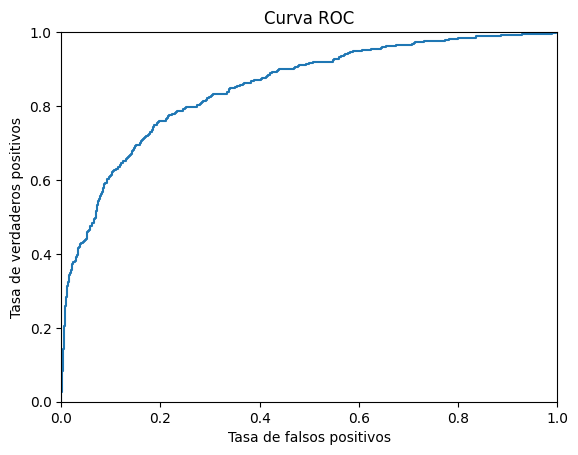

In [70]:
fdw_f_forest, tdw_f_forest, thresholds_forest_dw_f = roc_curve(target_valid,probabilities_one_valid_forest_dw_f)

plt.figure()
plt.plot(fdw_f_forest, tdw_f_forest)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

In [71]:
model = RandomForestClassifier(random_state=12345,n_estimators=41,max_depth=9,class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1_arbol_train=f1_score(target_valid,predicted_valid)
print(f1_arbol_train)

0.6241258741258741


In [72]:
probabilities_valid_forest = model.predict_proba(features_valid)
probabilities_one_valid_forest = probabilities_valid_forest[:, 1]
auc_roc=roc_auc_score(target_valid, probabilities_one_valid_forest)
print(auc_roc)

0.8485277401250861


In [73]:
print(confusion_matrix(target_valid,predicted_valid))
print(recall_score(target_valid,predicted_valid))
print(precision_score(target_valid,predicted_valid))

[[1713  252]
 [ 178  357]]
0.6672897196261682
0.5862068965517241


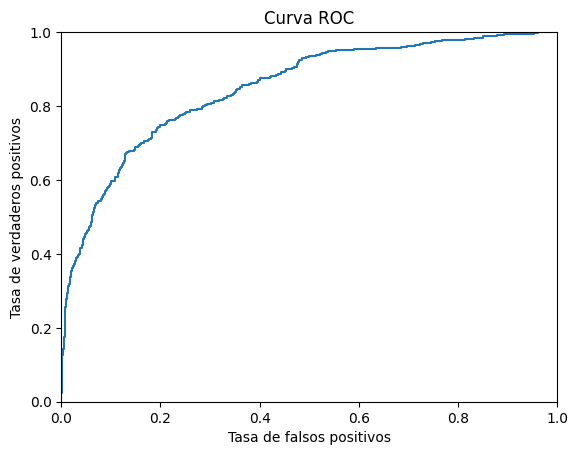

In [74]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(target_valid,probabilities_one_valid_forest)

plt.figure()
plt.plot(fpr_forest, tpr_forest)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()


<B><FONT color=blue> SE HACE LA PRUEBA CON EL MODELO DE BOSQUE ALEATORIO Y CONFORME A LA METRICA AUC-ROC NOS DA UN RESULTADO BUENO DE 0.8485 , ASI MISMO TAMBIEN EN LA MATRIZ DE CONFUSION PODEMOS NOTAR QUE LAS MAJORES PREDICCIONES CORRESPONDEN AL VERDADERO NEGATIVO Y VERDADERO POSITIVO, Y POR OTRA PARTE SE PUEDE APRECIAR LA CURVA ROC CON BUEN RENDIMIENTOEN COMPARACION A DONWSAMPLED Y UPSAMPLED  </FONT></B>


<B><FONT color=blue> SE HACE LA PRUEBA CON EL MODELO DE BOSQUE ALEATORIO y UPSAMPLING Y CONFORME A LA METRICA AUC-ROC NOS DA UN RESULTADO PERFECTO DE 1 , ASI MISMO TAMBIEN EN LA MATRIZ DE CONFUSION PODEMOS NOTAR QUE EXISTEN LAS PREDICCIONES IDEALES AL VERDADERO NEGATIVO Y VERDADERO POSITIVO, Y POR OTRA PARTE SE PUEDE APRECIAR LA CURVA ROC CON PERFECTO RENDIMIENTO  </FONT></B>